In [163]:
import pandas as pd
import numpy as np
import pyreadr
from scipy.spatial import distance
from tqdm import tqdm

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import os

In [164]:
#Global Variables

SUBSET = True
SUBSET_SIZE = 1000

NEW_INDICES = True

NEW_CV_INDICES = True

PLOT_ENTIRE_AREA = True
PLOT_FOLDS = False

START_YEAR_TRAIN = 2004
NUMBER_YEARS_TRAIN = 3
YEARS_TO_TRAIN = [START_YEAR_TRAIN + i  for i in range(NUMBER_YEARS_TRAIN + 1)]

PREDICT_YEAR = START_YEAR_TRAIN + NUMBER_YEARS_TRAIN

FOLDER_NAME = ''.join([f'{START_YEAR_TRAIN + i}_' for i in list(range(NUMBER_YEARS_TRAIN))]) + f'PREDICT_{PREDICT_YEAR}'


FILE_PATH = f'FeatureImportanceResults/{FOLDER_NAME}/'

if not os.path.exists(f'FeatureImportanceResults/{FOLDER_NAME}'):
    os.makedirs(f'FeatureImportanceResults/{FOLDER_NAME}')

In [165]:
df_full = pd.read_csv(f'/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData{START_YEAR_TRAIN}.csv')

for year in YEARS_TO_TRAIN[1:]:
    filename = f'/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData{str(year)}.csv'
    df_full = pd.concat([df_full, pd.read_csv(filename)])

print(np.unique(df_full.year))
print(df_full.shape)

[2006 2007 2008 2009]
(664513, 216)


In [166]:
#should year be in it? 

In [167]:
X_cols  = ['year', 'rain1', 'elevation', 'slope', 'aspect', 'near_mines',
       'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 'murder_threats',
       'assassination', 'assassination_attempt', 'f_emitted_count',
       'expen_agri', 'expen_env_man', 'expen_agr_org', 'expen_mining',
       'expen_petrol', 'expen_prom_ani_pro', 'expen_prom_veg_pro',
       'expen_other_agr', 'expen_agr_defense', 'expen_min_fuel',
       'illegal_mining', 'illegal_other', 'illegal_industry', 'audits',
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full',
       'incumbant', 'term_limited_seat', 'special',
       'overall_winner_complete_college', 
       'overall_winner_feminino', 'overall_winner_agriculture_job',
       'overall_winner_public_service_job', 'overall_winner_health_job',
       'overall_winner_corporate_job', 'overall_winner_law_job',
       'overall_winner_technical_job', 'overall_winner_professional_job',
       'overall_winner_mining_job', 'overall_winner_partido_PT',
       'overall_winner_partido_PMDB_MDB', 'overall_winner_partido_PSDB',
       'overall_winner_partido_DEM', 'overall_winner_partido_PL',
       'overall_winner_partido_other', 'runnerup_partido_PT',
       'runnerup_partido_PMDB_MDB', 'runnerup_partido_PSDB',
       'runnerup_partido_DEM', 'runnerup_partido_PL',
       'runnerup_partido_other', 'winner_votes_proportion',
       'vote_participation_proportion',
       'forest_formation', 'savanna', 'mangrove', 'silvicultura',
       'pasture', 'sugarcane', 'mosaic_ag', 'urban', 'mining', 'water',
       'soybean', 'rice', 'other_crop', 'coffee', 'citrus',
       'other_perennial', 'forest_lag']


#'runnerup_votes_proportion', 
#'overall_winner_idade',

## Test Train Split

In [168]:
from sklearn.model_selection import GroupKFold, cross_val_predict
import geopandas as gpd

In [169]:
#split into two groups where no muni in train set is tested
#then do a second split by year so that the train years are year n, n+1, n+2 and the test set uses n+3.
if SUBSET:
    df_full = df_full.sample(SUBSET_SIZE).reset_index(drop=True)


Y = df_full['forest_diff']
X = df_full[X_cols]
# gdf = gpd.GeoDataFrame(X, geometry = gpd.points_from_xy(df_full.x, df_full.y))
# XYs = gdf['geometry']


if NEW_INDICES:

    #Select Test/Train Indices
    n_folds = 10 
    munis = df_full['ID'].values
    group_kfold = GroupKFold(n_splits = n_folds)
    muni_kfold = group_kfold.split(X, Y, munis) 
    train_indices, test_indices = [list(traintest) for traintest in zip(*muni_kfold)]
    city_cv = [*zip(train_indices,test_indices)]

    test_inds = []
    for i in range(3):
        test_inds.extend(city_cv[i][1])

    train_inds = []
    for i in range(3, 10):
        train_inds.extend(city_cv[i][1])

    print(f'Test set pct of data: {len(test_inds)/(len(train_inds) + len(test_inds)) * 100}')


    np.save('FeatureImportanceResults/test_inds.npy', test_inds)
    np.save('FeatureImportanceResults/train_inds.npy', train_inds)
    print('New test/train indices generated and read in')

if not NEW_INDICES:
    test_inds = np.load('test_inds.npy')
    train_inds = np.load('train_inds.npy')
    print('Existing test/train indices read in from previous iteration')

Test set pct of data: 30.0
New test/train indices generated and read in


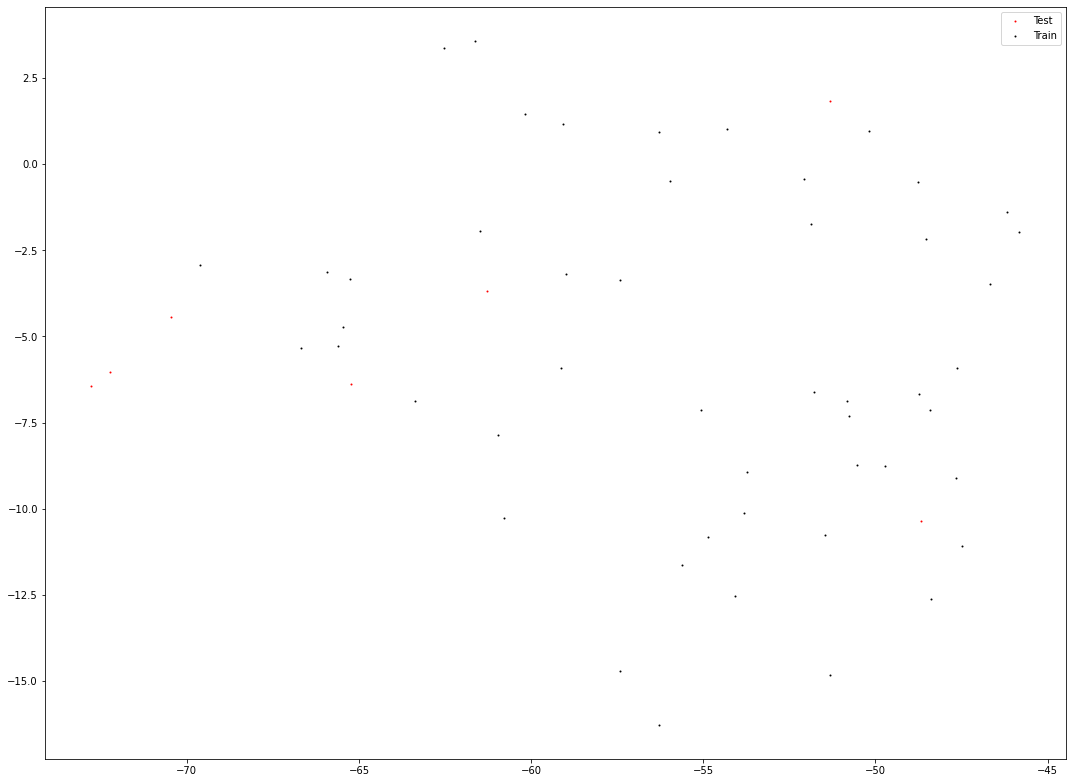

In [170]:

#Split data into test/train sets

df_full_test = df_full.iloc[test_inds].reset_index(drop=True)
df_full_train = df_full.iloc[train_inds].reset_index(drop=True)

#test data has only the last year with unseen spatial samples
df_full_test = df_full_test[df_full_test.year == PREDICT_YEAR]

#train data has only the 3 train years 
df_full_train = df_full_train[df_full_train.year < PREDICT_YEAR]

Y_test = df_full_test['forest_diff']
Y_train = df_full_train['forest_diff']

X_test = df_full_test[X_cols]
X_train = df_full_train[X_cols]

gdf_test = gpd.GeoDataFrame(X_test, geometry = gpd.points_from_xy(df_full_test.x, df_full_test.y))
gdf_train = gpd.GeoDataFrame(X_train, geometry = gpd.points_from_xy(df_full_train.x, df_full_train.y))

XYs_test = gdf_test['geometry']
XYs_train = gdf_train['geometry']

if PLOT_ENTIRE_AREA and NEW_INDICES:
    fig, axs = plt.subplots(1, 1, figsize=(15, 12))
    marker_size = 0.1
    marker_size = 1
    XYs_test.plot(ax=axs, color = 'red', markersize=marker_size, label = 'Test')
    XYs_train.plot(ax=axs, color = 'black', markersize=marker_size, label = 'Train')

    plt.legend(markerscale=1)
    plt.tight_layout()

    # Save the figure
    plt.savefig(FILE_PATH + 'EntirePlot')

    plt.show()

In [171]:
print(np.unique(df_full_test.year))
print(np.unique(df_full_train.year))

[2009]
[2006 2007 2008]


In [172]:
NEW_CV_INDICES = True

if NEW_CV_INDICES:
    #Select Cross Validation Fold Indices: 

    n_folds = 5
    munis = df_full_train['ID'].values
    group_kfold = GroupKFold(n_splits = n_folds)

    # Generator for the train/test indices
    muni_kfold = group_kfold.split(X_train, Y_train, munis) 

    # Create a nested list of train and test indices for each fold
    train_indices, test_indices = [list(traintest) for traintest in zip(*muni_kfold)]
    muni_cv = [*zip(train_indices,test_indices)]

    np.save('FeatureImportanceResults/muni_cv.npy', muni_cv)
    print('New test/train indices generated and read in')

if not NEW_CV_INDICES:
    muni_cv = np.load('muni_cv.npy')
    print('Existing test/train cross validation indices read in from previous iteration')


if PLOT_FOLDS and NEW_CV_INDICES: 
    fig, axs = plt.subplots(1, n_folds, figsize=(25, 16))
    marker_size = 0.01

    for i in range(n_folds):
        ax = axs[i]

        this_train_inds = muni_cv[i][0]
        this_test_inds = muni_cv[i][1]
        XYs_train[this_test_inds].plot(ax=ax, color = 'red', markersize=marker_size, label = 'Test')
        XYs_train[this_train_inds].plot(ax=ax, color = 'black', markersize=marker_size, label = 'Train')
        ax.set_title(f"Fold {i+1}")

    #plt.suptitle(f'{n_folds}-Fold Spatial Cross Validation ') 
    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels)   

    for ax in axs.flat:
        ax.set_axis_off()


    plt.legend(markerscale=100)
    plt.tight_layout()
    plt.savefig(FILE_PATH + 'FoldPlot')
    plt.show()




New test/train indices generated and read in


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [173]:
muni_cv

[(array([ 0,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 41, 42, 43,
         44, 45, 46, 47, 48]),
  array([ 1,  2,  7, 11, 31, 33, 37, 38, 39, 40])),
 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
         19, 20, 22, 23, 24, 25, 26, 27, 31, 33, 35, 36, 37, 38, 39, 40, 42,
         43, 44, 45, 46, 47]),
  array([ 4, 13, 21, 28, 29, 30, 32, 34, 41, 48])),
 (array([ 1,  2,  3,  4,  5,  7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21,
         22, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
         43, 45, 46, 47, 48]),
  array([ 0,  6,  8,  9, 14, 23, 25, 26, 27, 44])),
 (array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 16, 18, 19, 20,
         21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39,
         40, 41, 42, 44, 48]),
  array([ 3, 12, 15, 17, 24, 35, 43, 45, 46, 47])),
 (array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 11, 12,

In [174]:
X_train.head()

,year,rain1,elevation,slope,aspect,near_mines,near_roads,near_hidrovia,indigenous_homol,mun_election_year,...,mining,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,geometry
0,2006,29.53579,133.0,1.0,169.0,54300.08,33801.450,1513.313,0.0,0.0,...,0.0,1.169319,0.0,0.0,0.0,0,0,0.0,0.415126,POINT (-48.72500 -6.67500)
1,2008,22.64965,440.0,1.0,3.0,74230.36,62999.940,93036.520,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0,0,0.0,0.051898,POINT (-47.47500 -11.07500)
2,2008,32.43208,338.0,1.0,312.0,25947.20,30438.440,55503.200,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0,0,0.0,0.040543,POINT (-54.87500 -10.82500)
3,2006,25.20410,275.0,1.0,241.0,145268.70,2853.786,34088.380,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0,0,0.0,0.466221,POINT (-47.67500 -9.12500)
4,2007,31.86893,258.0,1.0,232.0,187675.90,72110.610,114159.900,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0,0,0.0,3.144678,POINT (-55.97500 -0.47500)


In [175]:
# Count null values in each column
null_counts = {col: X_train[col].isnull().sum() for col in X_train.columns}

# Sort the dictionary in descending order based on the values
sorted_null_counts = dict(sorted(null_counts.items(), key=lambda item: item[1], reverse=True))

print(sorted_null_counts)

{'year': 0, 'rain1': 0, 'elevation': 0, 'slope': 0, 'aspect': 0, 'near_mines': 0, 'near_roads': 0, 'near_hidrovia': 0, 'indigenous_homol': 0, 'mun_election_year': 0, 'new_forest_code': 0, 'lula': 0, 'dilma': 0, 'temer': 0, 'bolsonaro': 0, 'fed_election_year': 0, 'populacao': 0, 'pib_pc': 0, 'ironore': 0, 'silver': 0, 'copper': 0, 'gold': 0, 'soy_price': 0, 'beef_price': 0, 'ag_jobs': 0, 'mining_jobs': 0, 'public_jobs': 0, 'construction_jobs': 0, 'PIB': 0, 'n_companies_PUBLIC ADMIN': 0, 'n_companies_AGRICULTURE': 0, 'n_companies_FOOD AND DRINKS': 0, 'n_companies_ACCOMODATION AND FOOD': 0, 'n_companies_EQUIPMENT RENTAL': 0, 'n_companies_WHOLESALE': 0, 'n_companies_ASSOCIATIVE ACTIVITIES': 0, 'n_companies_AUTOMOBILES AND TRANSPORT': 0, 'n_companies_FINANCIAL ASSISTANCE': 0, 'n_companies_TRADE REP VEHICLES': 0, 'n_companies_CONSTRUCTION': 0, 'n_companies_MAIL AND TELECOM': 0, 'n_companies_CULTURE AND SPORT': 0, 'n_companies_EDITING AND PRINTING': 0, 'n_companies_EDUCATION': 0, 'n_companies

In [176]:
X_train = X_train.drop('geometry', axis = 1)
X_test = X_test.drop('geometry', axis = 1)

In [177]:
with open(FILE_PATH + 'performance.txt', 'w+') as f:
        f.write(f'MODEL PERFORMANCES\n')

In [178]:
def generate_results_table(coef_input, key_input, name_input, yhat, normalized = True):
    if normalized: 
        coef_input = coef_input / sum(coef_input)

    #write MSE to file 
    mse = mean_squared_error(Y_test, yhat)
    print(f'{name_input} MSE: {mse}')

    with open(FILE_PATH + 'performance.txt', 'a') as f:
        f.write(f'\n{name_input} MSE: {mse}')


    features_df = pd.DataFrame([key_input, coef_input]).T
    features_df.columns = ['Feature', 'Coeff']

    features_df = features_df.iloc[features_df['Coeff'].abs().argsort()[::-1]]
    features_df.to_csv(f'{FILE_PATH}{name_input}.csv')

    return features_df




In [179]:
base_learners = []

yhat_list = []

## Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [181]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',RandomForestRegressor(n_estimators = 500))
])

In [182]:
search = GridSearchCV(pipeline,
                      {'model__max_depth': np.arange(3,11,8) },
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [183]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............model__max_depth=3;, score=-0.043 total time=   0.7s
[CV 2/5] END ...............model__max_depth=3;, score=-0.005 total time=   0.6s
[CV 3/5] END ...............model__max_depth=3;, score=-0.314 total time=   0.6s
[CV 4/5] END ...............model__max_depth=3;, score=-0.031 total time=   0.6s
[CV 5/5] END ...............model__max_depth=3;, score=-0.100 total time=   0.6s


GridSearchCV(cv=[(array([ 0,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 41, 42, 43,
       44, 45, 46, 47, 48]),
                  array([ 1,  2,  7, 11, 31, 33, 37, 38, 39, 40])),
                 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 24, 25, 26, 27, 31, 33, 35, 36, 37, 38, 39, 40, 42,
       43, 44, 45, 46, 47]),
                  array([ 4, 13, 21, 28, 29, 30, 32, 34, 41, 48])),
                 (array([ 1,  2,  3,  4,  5,  7...
                 (array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14, 15, 17, 21, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,
       43, 44, 45, 46, 47, 48]),
                  array([ 5, 10, 16, 18, 19, 20, 22, 36, 42]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(n_estimators=500))]),
             param_grid={'model__max_depth': array([3])},
             scoring='neg_mean_squared_error', verbose=3)

In [184]:
#model = RandomForestRegressor(n_estimators = 500, max_depth = search.best_params_['model__max_depth'])
#model.fit(X_train, Y_train)

In [185]:
base_learners.append(('randomforest', search.best_estimator_))

In [186]:
coefficients = search.best_estimator_._final_estimator.feature_importances_
importance = np.abs(coefficients)

yhat = search.best_estimator_.predict(X_test)
yhat_list.append(yhat)

randomforest_features_df = generate_results_table(coefficients, X_train.columns, 'randomforest', yhat)

X_train.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

randomforest MSE: 0.0029266148507147835


Index(['aspect', 'n_jobs_FORESTRY', 'n_jobs_BASIC METALLURGY',
       'n_companies_BASIC METALLURGY', 'emiss_agropec_full',
       'n_companies_PAPER', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES', 'pasture'],
      dtype='object')

In [187]:
randomforest_features_df

,Feature,Coeff
4,aspect,0.133875
115,n_jobs_FORESTRY,0.063417
100,n_jobs_BASIC METALLURGY,0.060328
48,n_companies_BASIC METALLURGY,0.057498
159,emiss_agropec_full,0.054908
...,...,...
80,n_companies_,0.0
89,n_jobs_FINANCIAL ASSISTANCE,0.0
90,n_jobs_TRADE REP VEHICLES,0.0
163,overall_winner_complete_college,0.0


## Lasso

In [188]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [189]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [190]:
search = GridSearchCV(pipeline,
                      {'model__alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [191]:
search.fit(X_train,Y_train)
base_learners.append(('lasso', search.best_estimator_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............model__alpha=1e-15;, score=-20.288 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-15;, score=-1.896 total time=   0.0s
[CV 3/5] END ...............model__alpha=1e-15;, score=-0.390 total time=   0.0s
[CV 4/5] END ...............model__alpha=1e-15;, score=-4.999 total time=   0.0s
[CV 5/5] END ...............model__alpha=1e-15;, score=-0.567 total time=   0.0s
[CV 1/5] END ..............model__alpha=1e-10;, score=-20.288 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-10;, score=-1.896 total time=   0.0s
[CV 3/5] END ...............model__alpha=1e-10;, score=-0.390 total time=   0.0s
[CV 4/5] END ...............model__alpha=1e-10;, score=-4.999 total time=   0.0s
[CV 5/5] END ...............model__alpha=1e-10;, score=-0.567 total time=   0.0s
[CV 1/5] END ..............model__alpha=1e-08;, score=-20.287 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-08;,

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.034e-02, tolerance: 3.878e-04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e-03, tolerance: 3.924e-04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e-02, tolerance: 3.926e-04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.718e-02, tolerance: 3.196e-04


[CV 1/5] END ...................model__alpha=1;, score=-0.012 total time=   0.0s
[CV 2/5] END ...................model__alpha=1;, score=-0.007 total time=   0.0s
[CV 3/5] END ...................model__alpha=1;, score=-0.314 total time=   0.0s
[CV 4/5] END ...................model__alpha=1;, score=-0.007 total time=   0.0s
[CV 5/5] END ...................model__alpha=1;, score=-0.088 total time=   0.0s
[CV 1/5] END ...................model__alpha=5;, score=-0.012 total time=   0.0s
[CV 2/5] END ...................model__alpha=5;, score=-0.007 total time=   0.0s
[CV 3/5] END ...................model__alpha=5;, score=-0.314 total time=   0.0s
[CV 4/5] END ...................model__alpha=5;, score=-0.007 total time=   0.0s
[CV 5/5] END ...................model__alpha=5;, score=-0.088 total time=   0.0s
[CV 1/5] END ..................model__alpha=10;, score=-0.012 total time=   0.0s
[CV 2/5] END ..................model__alpha=10;, score=-0.007 total time=   0.0s
[CV 3/5] END ...............

In [192]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

yhat = search.best_estimator_.predict(X_test)
yhat_list.append(yhat)

lasso_features_df = generate_results_table(coefficients, X_train.columns, 'lasso', yhat = yhat)

X_train.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

lasso MSE: 0.003808626589698804


invalid value encountered in true_divide


Index(['forest_lag', 'n_companies_FORESTRY',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RECYCLING',
       'n_companies_REAL ESTATE', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_CHEMICALS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_OIL AND GAS'],
      dtype='object')

## Gradient Boosting

In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',GradientBoostingRegressor(learning_rate = 0.1, min_samples_leaf = 2))
])

In [195]:
search = GridSearchCV(pipeline,
                      {'model__n_estimators':np.arange(50, 150, 50), 'model__max_depth':np.arange(3, 5, 1)},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [196]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END model__max_depth=3, model__n_estimators=50;, score=-0.069 total time=   0.1s
[CV 2/5] END model__max_depth=3, model__n_estimators=50;, score=-0.011 total time=   0.0s
[CV 3/5] END model__max_depth=3, model__n_estimators=50;, score=-0.323 total time=   0.0s
[CV 4/5] END model__max_depth=3, model__n_estimators=50;, score=-0.025 total time=   0.0s
[CV 5/5] END model__max_depth=3, model__n_estimators=50;, score=-0.089 total time=   0.0s
[CV 1/5] END model__max_depth=3, model__n_estimators=100;, score=-0.065 total time=   0.1s
[CV 2/5] END model__max_depth=3, model__n_estimators=100;, score=-0.007 total time=   0.1s
[CV 3/5] END model__max_depth=3, model__n_estimators=100;, score=-0.324 total time=   0.1s
[CV 4/5] END model__max_depth=3, model__n_estimators=100;, score=-0.024 total time=   0.1s
[CV 5/5] END model__max_depth=3, model__n_estimators=100;, score=-0.081 total time=   0.1s
[CV 1/5] END model__max_depth=4, mo

GridSearchCV(cv=[(array([ 0,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 41, 42, 43,
       44, 45, 46, 47, 48]),
                  array([ 1,  2,  7, 11, 31, 33, 37, 38, 39, 40])),
                 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 24, 25, 26, 27, 31, 33, 35, 36, 37, 38, 39, 40, 42,
       43, 44, 45, 46, 47]),
                  array([ 4, 13, 21, 28, 29, 30, 32, 34, 41, 48])),
                 (array([ 1,  2,  3,  4,  5,  7...
                 (array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14, 15, 17, 21, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,
       43, 44, 45, 46, 47, 48]),
                  array([ 5, 10, 16, 18, 19, 20, 22, 36, 42]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(min_samples_leaf=2))]),
             param_grid={'model__max_depth': array([3, 4]),
                         'model__n_estimators': array([ 50, 100])},
             scoring='neg_mean_squared_error', verbose=3)

In [197]:
search.best_params_

{'model__max_depth': 3, 'model__n_estimators': 100}

In [198]:
base_learners.append(('gradientboosting', search.best_estimator_.named_steps['model']))

In [199]:
coefficients = search.best_estimator_.named_steps['model'].feature_importances_
importance = np.abs(coefficients)

yhat = search.best_estimator_.predict(X_test)
yhat_list.append(yhat)

gradient_boosting_features_df = generate_results_table(coefficients, X_train.columns, 'gradientboosting', yhat)


X.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

gradientboosting MSE: 0.05710518054052186


Index(['n_companies_PAPER', 'forest_lag', 'pasture', 'aspect',
       'n_jobs_BASIC METALLURGY', 'n_companies_BASIC METALLURGY',
       'n_companies_ASSOCIATIVE ACTIVITIES', 'overall_winner_feminino',
       'rain1'],
      dtype='object')

## Neural Network

In [200]:
from sklearn.neural_network import MLPRegressor
import shap

In [201]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model', MLPRegressor(activation = 'logistic', random_state=42))
])

In [202]:
search = GridSearchCV(pipeline,
                      {'model__hidden_layer_sizes':[(50,),(100,)], 'model__alpha':np.arange(0.00001, 0.001, 0.001)},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [203]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.276 total time=   0.1s
[CV 2/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.126 total time=   0.1s
[CV 3/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.540 total time=   0.0s
[CV 4/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.504 total time=   0.1s
[CV 5/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.345 total time=   0.1s
[CV 1/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.204 total time=   0.1s
[CV 2/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.136 total time=   0.1s
[CV 3/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.544 total time=   0.0s
[CV 4/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.239 total time=   0.1s
[CV 5/5] END model__alpha=1e-05, model__hidde

GridSearchCV(cv=[(array([ 0,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 41, 42, 43,
       44, 45, 46, 47, 48]),
                  array([ 1,  2,  7, 11, 31, 33, 37, 38, 39, 40])),
                 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 24, 25, 26, 27, 31, 33, 35, 36, 37, 38, 39, 40, 42,
       43, 44, 45, 46, 47]),
                  array([ 4, 13, 21, 28, 29, 30, 32, 34, 41, 48])),
                 (array([ 1,  2,  3,  4,  5,  7...
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,
       43, 44, 45, 46, 47, 48]),
                  array([ 5, 10, 16, 18, 19, 20, 22, 36, 42]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        MLPRegressor(activation='logistic',
                                                     random_state=42))]),
             param_grid={'model__alpha': array([1.e-05]),
                         'model__hidden_layer_sizes': [(50,), (100,)]},
             scoring='neg_mean_squared_error', verbose=3)

In [204]:
base_learners.append(('neuralnetwork', search.best_estimator_))

In [205]:
explainer = shap.KernelExplainer(search.best_estimator_.predict, X_train)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [206]:
shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/7 [00:00<?, ?it/s]X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 14%|█▍        | 1/7 [00:00<00:02,  2.38it/s]X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature nam

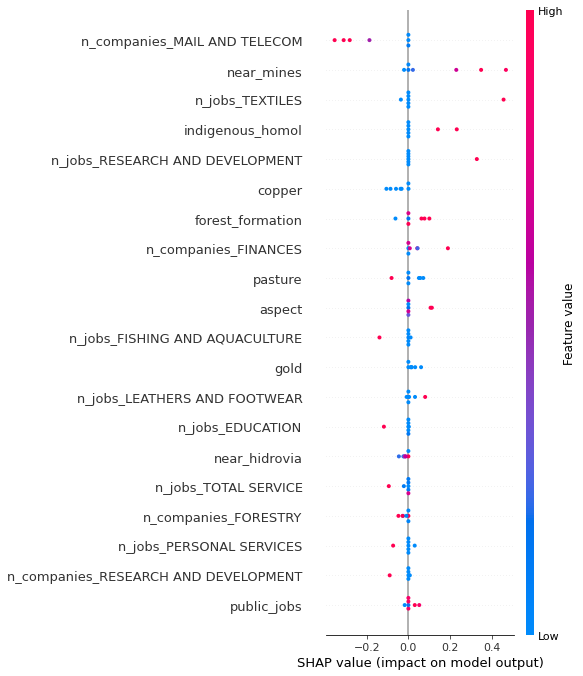

In [207]:
shap.summary_plot(shap_values,X_test,feature_names=X_test.columns)

In [208]:
feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

#shap_importance.to_csv('FeatureInportanceResults/neuralnetwork.csv')

In [209]:
yhat = search.best_estimator_.predict(X_test)
yhat_list.append(yhat)

In [210]:
nn_features_df = generate_results_table(np.array(shap_importance.feature_importance_vals), np.array(shap_importance.col_name), 'neuralnetwork', yhat)

neuralnetwork MSE: 0.175237440735093


In [211]:
sum(nn_features_df.Coeff)

1.0000000000000004

## Super Learner Ensemble

In [212]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [213]:
def get_models():
    base_models = []
    #Random forest regressor
    base_models.append(base_learners[0][1][1])
    #Lasso
    base_models.append(base_learners[1][1][1])
    #Gradient Boosting
    base_models.append(base_learners[2][1])
    #NeuralNetwork
    base_models.append(base_learners[3][1][1])
    return base_models

def get_out_of_fold_predictions(X_train, Y_train, base_models):
    meta_X = []
    meta_Y = []

    # enumerate splits
    for train_ix, test_ix in muni_cv:
        fold_yhats = []
        meta_train_X, meta_test_X = X_train.iloc[train_ix], X_train.iloc[test_ix]
        meta_train_Y, meta_test_Y = Y_train.iloc[train_ix], Y_train.iloc[test_ix]
        meta_Y.extend(meta_test_Y)

        # fit and make predictions with each sub-model
        for model in base_models:
            model.fit(meta_train_X, meta_train_Y)
            yhat = model.predict(meta_test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
       
        meta_X.append(np.hstack(fold_yhats))
            
    return np.vstack(meta_X), np.asarray(meta_Y)

def super_learner_predictions(X, models, meta_model):
	meta_X = []
	for model in models:
		yhat = model.predict(X) 
		meta_X.append(yhat)
	# predict
	return meta_model.predict(pd.DataFrame(meta_X).T)
    
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 

def fit_meta_model(X, y):
	model = Ridge()
	model.fit(X, y)
	return model

def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, mse))

In [214]:
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, Y_train, models)
print('Meta Data Shape: ', meta_X.shape, meta_y.shape)

fit_base_models(X_train, Y_train, models)
meta_model = fit_meta_model(meta_X, meta_y)

evaluate_models(X_test, Y_test, models)

yhat = super_learner_predictions(X_test, models, meta_model)
yhat_list.append(yhat)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, yhat)
print("MSE:", mse)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+00, tolerance: 3.924e-04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e-01, tolerance: 9.124e-05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+00, tolerance: 3.926e-04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e-01, tolerance: 3.196e-04


Meta Data Shape:  (49, 4) (49,)


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+00, tolerance: 3.982e-04


RandomForestRegressor: 0.003
Lasso: 0.395
GradientBoostingRegressor: 0.048
MLPRegressor: 0.016
MSE: 0.0030315292243446165


In [215]:
#Super Learner Feature Importance

#Random forest 
random_forest_weighted_importance = models[0].feature_importances_ * meta_model.coef_[0]

#Lasso 
lasso_weighted_importance = models[1].coef_ * meta_model.coef_[1]

#GradientBoostingRegressor
gradient_boosting_weighted_importance = models[2].feature_importances_ * meta_model.coef_[2]

#NeuralNetwork
explainer = shap.KernelExplainer(models[2].predict, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])


nn_weighted_importance = shap_importance.feature_importance_vals * meta_model.coef_[3]


super_learner_feature_importance = np.mean([random_forest_weighted_importance, lasso_weighted_importance, gradient_boosting_weighted_importance, nn_weighted_importance], axis = 0)


super_learner_features_df = generate_results_table(super_learner_feature_importance, X_train.columns, 'superlearner', yhat)

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  0%|          | 0/7 [00:00<?, ?it/s]X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 14%|█▍        | 1/7 [00:00<00:02,  2.92it/s]

superlearner MSE: 0.0030315292243446165


## Visualize Deforestation Predictions

In [253]:
import matplotlib.gridspec as gridspec

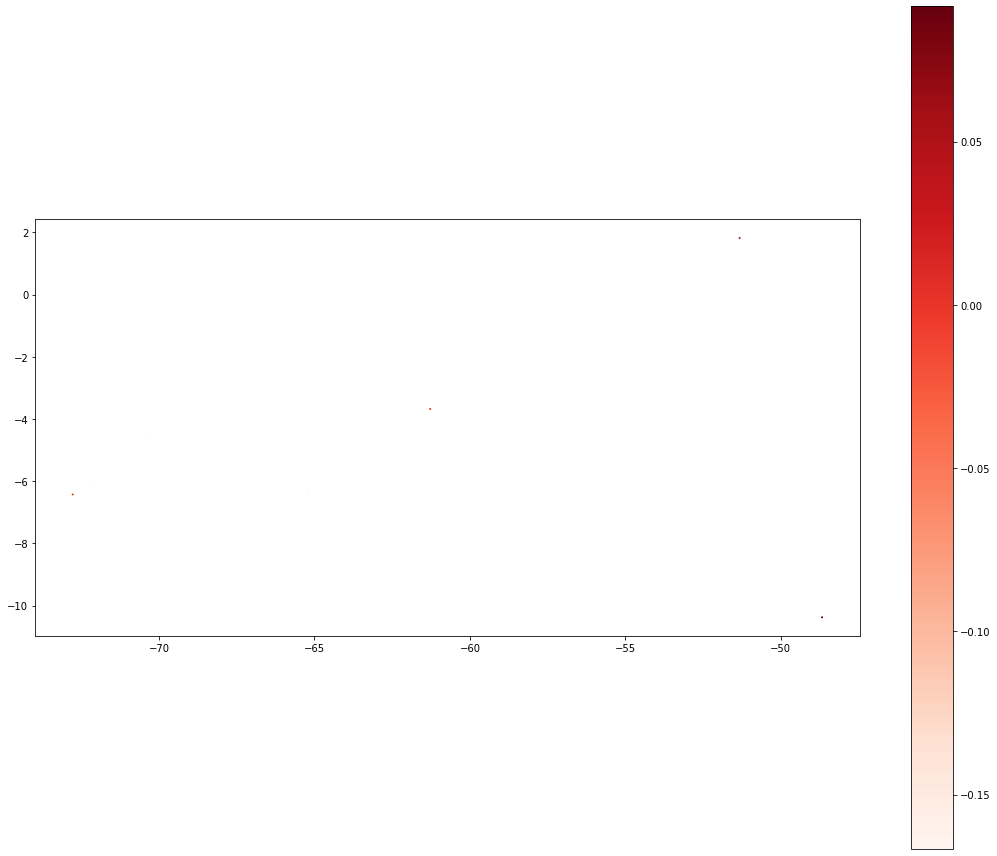

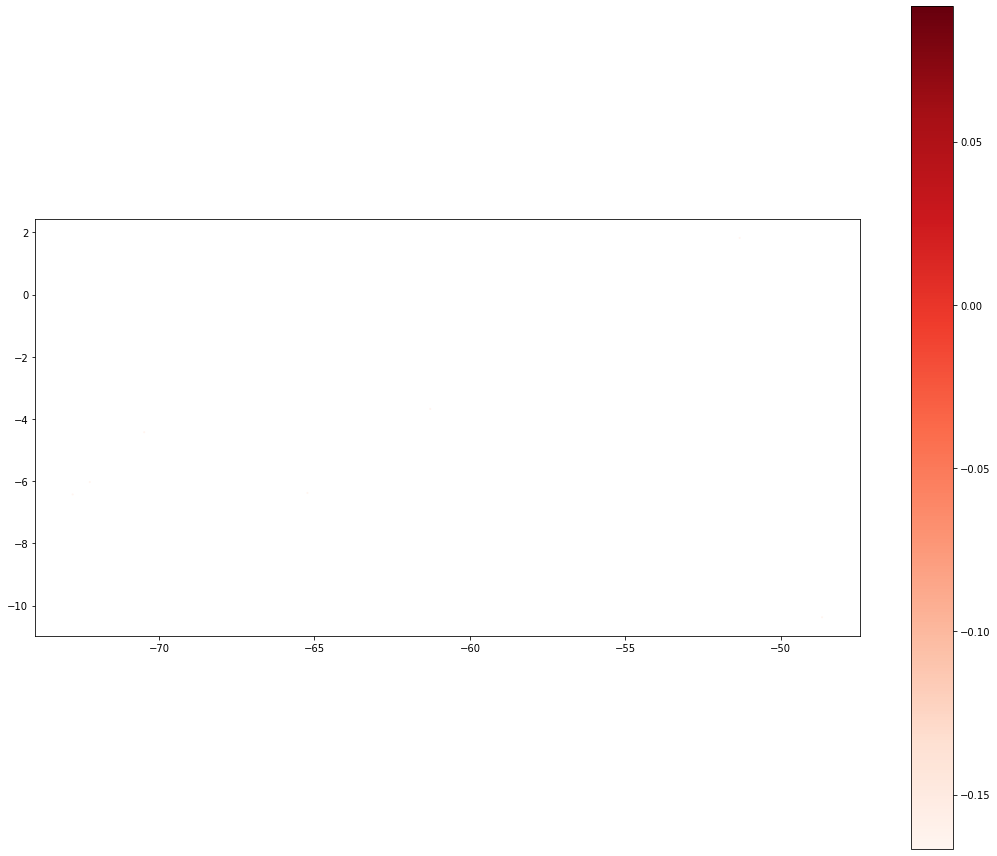

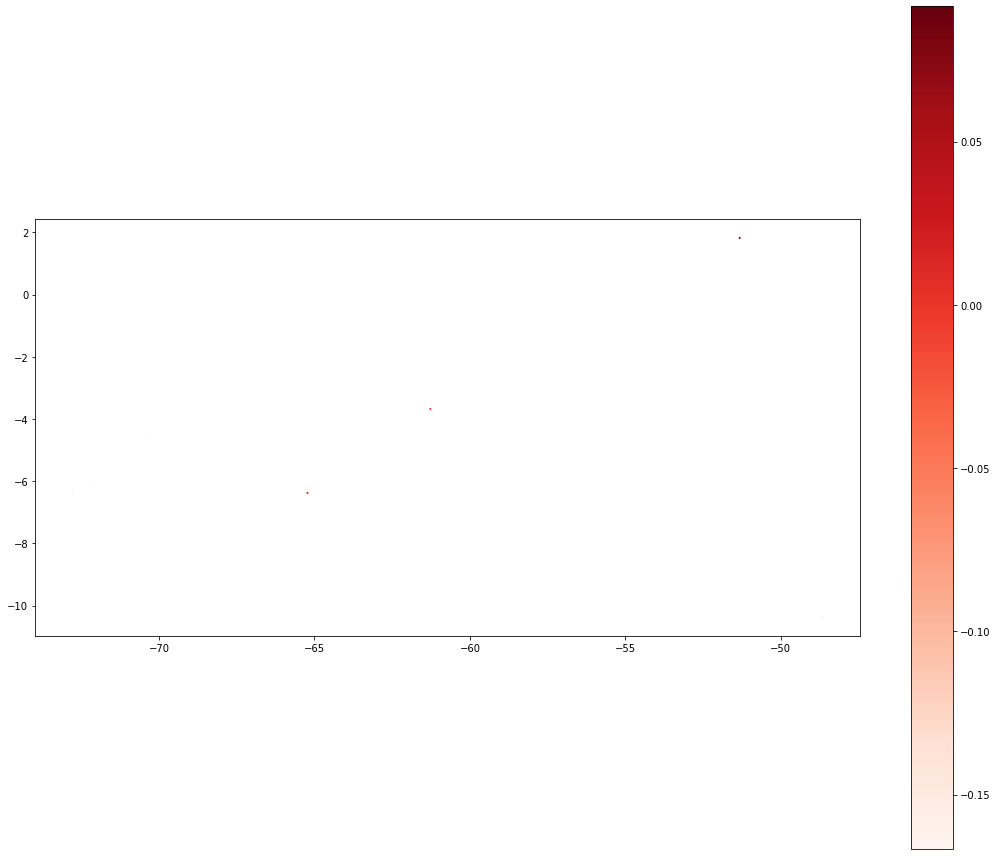

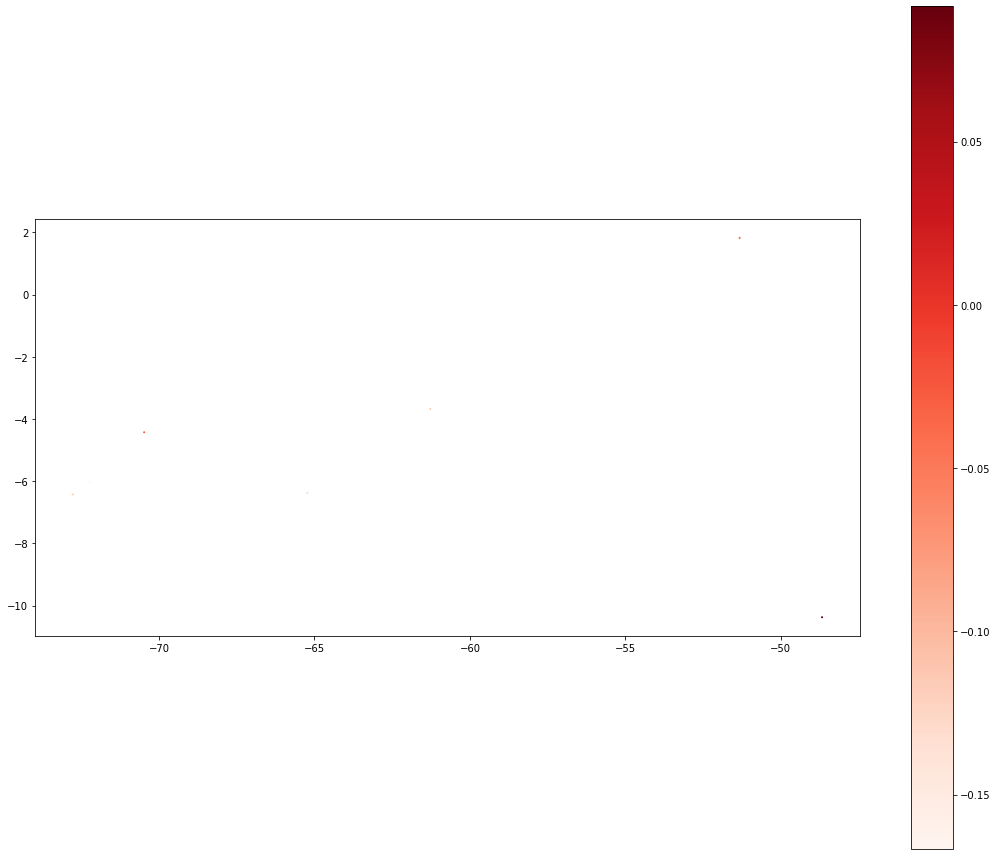

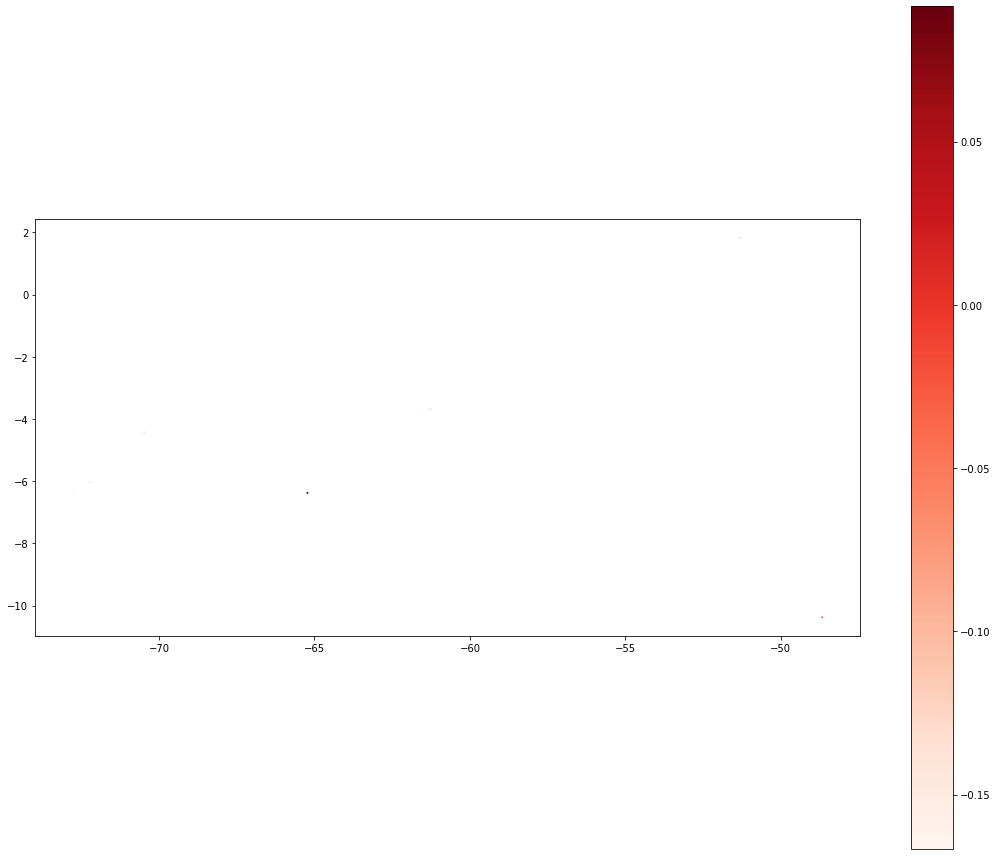

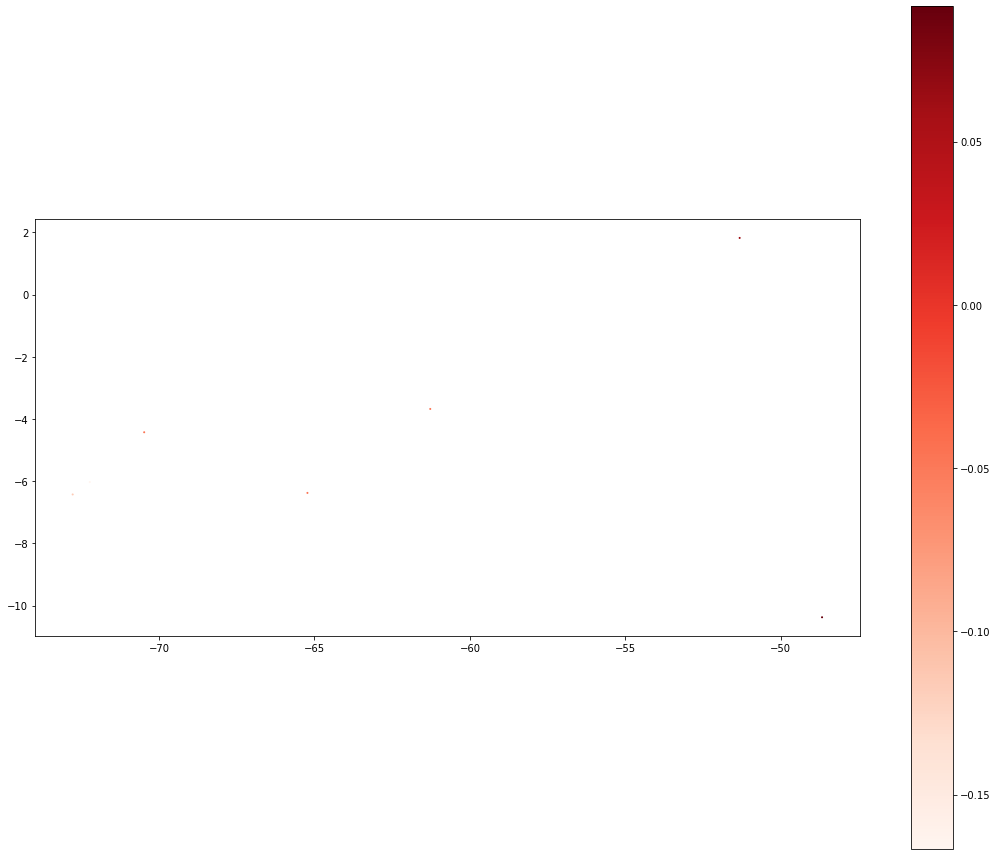

In [257]:
prediction_df = -pd.DataFrame(yhat_list).T
prediction_df.columns = ['randomforest', 'lasso', 'gradientboosting', 'nn', 'superlearner']
prediction_df['avg'] = prediction_df.mean(axis=1)
prediction_df['x'] = np.array(df_full_test['x'])
prediction_df['y'] = np.array(df_full_test['y'])
prediction_df['actual']  = -np.array(Y_test)
prediction_df.to_csv(FILE_PATH + 'predictions.csv')

for col_name in ['randomforest', 'lasso', 'gradientboosting', 'nn', 'superlearner', 'avg']:
    gdf_yhat = gpd.GeoDataFrame(prediction_df, geometry = gpd.points_from_xy(prediction_df.x, prediction_df.y))
    fig, axs = plt.subplots(1, 1, figsize=(15, 12))
    marker_size = 1
    gdf_yhat.plot(column = col_name, cmap = 'Reds', ax=axs, markersize = marker_size)

    #plt.legend(markerscale=1)
    plt.tight_layout()

    

    # Show the colorbar
    sm = plt.cm.ScalarMappable(cmap = 'Reds')
    sm.set_array(prediction_df['avg'])
    cbar = plt.colorbar(sm)
    

    # Save the figure
    plt.savefig(FILE_PATH + 'DeforestPlot_' + col_name)

    plt.show()


## Data Viz

In [59]:
from mlens.visualization import corr_X_y, corrmat

[MLENS] backend: threading


An input array is constant; the correlation coefficent is not defined.


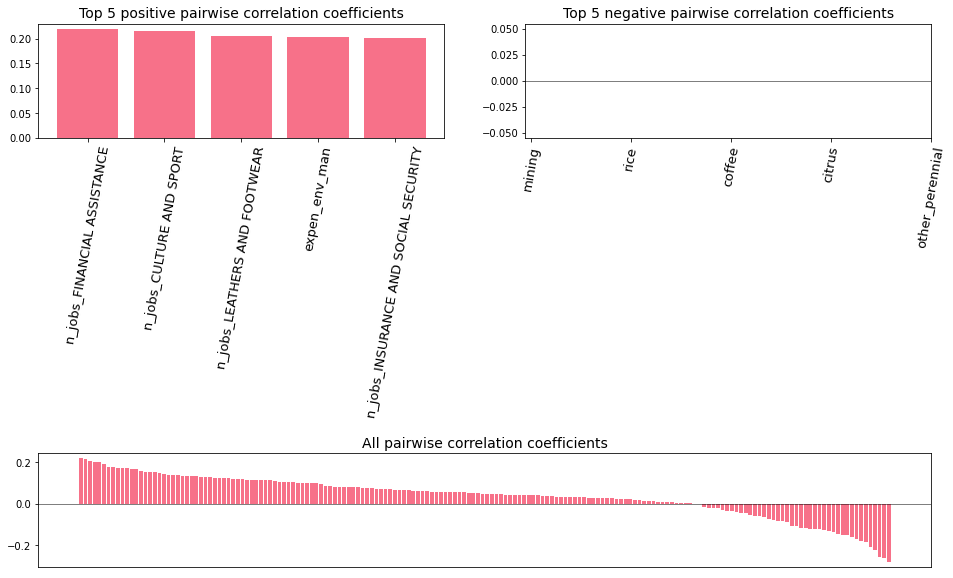

GridSpec(2, 2)

In [60]:
corr_X_y(X_train, Y_train, figsize=(16, 10), label_rotation=80, hspace=1, fontsize=14)